### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [11]:
#your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [12]:
#your code here
user_movie_ratings = pd.read_csv('Data.csv')
user_movie_ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
movie_info = pd.read_csv('item.csv')
movie_info.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:
user_info = pd.read_csv('user.csv')
user_info.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [15]:
#your code here
print('User Movie Rating Info: \n')
print(user_movie_ratings.info, '\n')
print('Shape: \n')
print(user_movie_ratings.shape, '\n')
print('Mean , Standard Deviation and 5 Point Summary of the data: \n')
print(user_movie_ratings.describe(), '\n')
print(pd.DataFrame(user_movie_ratings.isnull().sum(), columns=['No Of Missing Values']))
print('\nTotal Count of missing values: ',user_movie_ratings.isnull().sum().sum())

User Movie Rating Info: 

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]> 

Shape: 

(100000, 4) 

Mean , Standard Deviation and 5 Point Summary of the data: 

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.0

**Observations:**

1. The data set has 100000 records and 4 columns

2. The average movie rating is 3.529 with a standard deviation of 1.125

3. There are movies with rating ranging from 1 to 5 and among those, 50% of the movies has rating as 4.0

4. The average rating lies below the mode hence it might be little bit left skewed.

5. The data set doesn't contain any null values


In [16]:
print('Movie Info: \n')
print(movie_info.info, '\n')
print('Shape: \n')
print(movie_info.shape, '\n')
print('Mean , Standard Deviation and 5 Point Summary of the data: \n')
print(movie_info.describe(), '\n')
print(pd.DataFrame(movie_info.isnull().sum(), columns=['No Of Missing Values']))
print('\nTotal Count of missing values: ',movie_info.isnull().sum().sum())

Movie Info: 

<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Anim

**Observations:**

1. The data set has 1681 rows and 22 columns

2. The movie genre is a categorical attribute which got converted into numerical values using the technique <b><i>One Hot Encoding </i></b> 

3. There are movies who belong to more than one genre

4. The data set doesn't contain any null values

In [17]:
print('User Info: \n')
print(user_info.info, '\n')
print('Shape: \n')
print(user_info.shape, '\n')
print('Mean , Standard Deviation and 5 Point Summary of the data: \n')
print(user_info.describe(), '\n')
print(pd.DataFrame(user_info.isnull().sum(), columns=['No Of Missing Values']))
print('\nTotal Count of missing values: ',user_info.isnull().sum().sum())


User Info: 

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]> 

Shape: 

(943, 5) 

Mean , Standard Deviation and 5 Point Summary of the data: 

          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000  

**Observations:**

1. The data set has 943 users and 4 attributes

2. We have users whose age ranging from 7 to 73 and 50 % of the user are with age 31

3. The average age is 34 which is greater than the mode (31) which indicates a slight positive or right skew.

4. Looking the max age, there might be a potential outlier in the data set

5. The data set doesn't contain any null values

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [18]:
#your code here
#To find the number of movies per genre, used sum aggregate function on the whole data set.
no_of_movies_per_genre = pd.DataFrame(movie_info.sum()[3:], columns=['Number Of movies per genre']).sort_values('Number Of movies per genre', ascending=False)
no_of_movies_per_genre

,Number Of movies per genre
Drama,725
Comedy,505
Action,251
Thriller,251
Romance,247
Adventure,135
Childrens,122
Crime,109
Sci-Fi,101
Horror,92


**Insights:**

1. Highest number of movies are from <b><i>Drama</i></b> genre

2. There exists one movie whos genre is unknown



### 5. Drop the movie where the genre is unknown - 2.5 marks

In [19]:
#your code here
print('Movie shape before deleting the unknown movies', movie_info.shape)
unknown_movie_index = movie_info[movie_info['unknown']==1].index # Get the index of rows where the movie genre is unknown 
movie_info.drop(unknown_movie_index, axis=0, inplace=True) # drop all the rows that matches the index in the unknown_movie_index list
print('Movie shape after deleting the unknown movies', movie_info.shape)

Movie shape before deleting the unknown movies (1681, 22)
Movie shape after deleting the unknown movies (1680, 22)


**Insights:**
1. We dropped the movies where the genre is unknown

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [20]:
#your code here
genres = movie_info.columns[3:]
def get_sum_of_generes (df):
    return df[genres].sum(axis=1)
movies_with_more_than_one_genre = movie_info[get_sum_of_generes(movie_info) >1] # Filter the movies that belong to more than one genre
# Concatenate movie title series with number of genres a movie bolong to and sort in descending order
pd.concat([movies_with_more_than_one_genre['movie title'], get_sum_of_generes(movies_with_more_than_one_genre).rename('number of genres for the movie')], axis=1).sort_values('number of genres for the movie', ascending=False)

,movie title,number of genres for the movie
171,"Empire Strikes Back, The",6
558,"Kid in King Arthur's Court, A",6
424,"Transformers: The Movie, The",6
753,Jumanji,5
16,From Dusk Till Dawn,5
...,...,...
703,Singin' in the Rain,2
707,Strictly Ballroom,2
710,Tin Men,2
712,Carrington,2


In [21]:
print('Total number of movies which has more than one genres', len(movies_with_more_than_one_genre))

Total number of movies which has more than one genres 849


**Insights:**

1. There are 849 movies that belong to more than one genre

2. The maximum number of genres that a movie belong to is 6

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


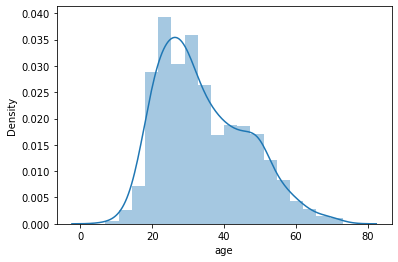

In [22]:
sns.distplot(user_info['age']); # distplot for the age

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


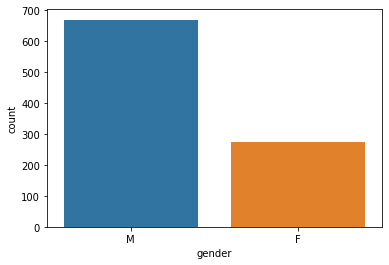

In [23]:
sns.countplot(user_info['gender']); # count plot to see how many users for each gender

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


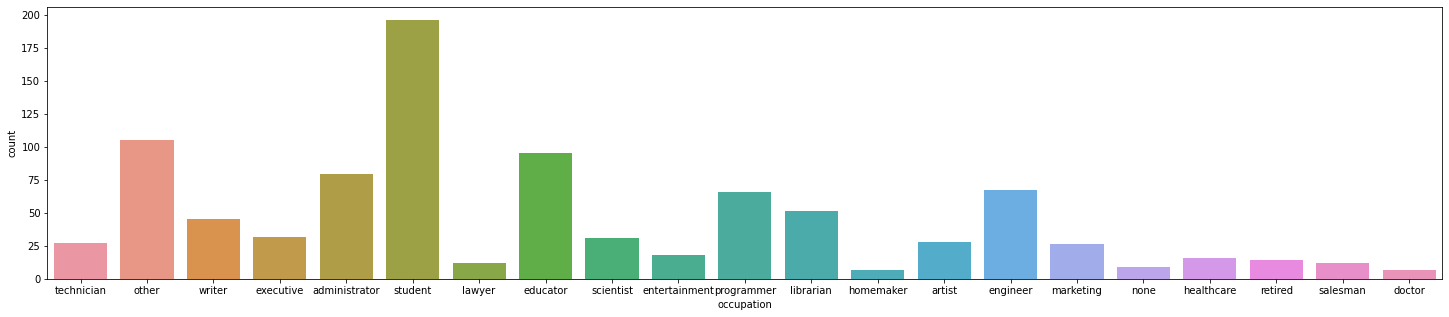

In [24]:
plt.figure(figsize=(25,5))
sns.countplot(user_info['occupation']); # count plot to see the nuber of users per occupation

In [25]:
#your code here
from datetime import datetime

movie_info['release date'] = movie_info['release date'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y'))# applied the datetime format
# to convert the string release date to a datetime object. Used lambda function
movie_info['release year'] = movie_info['release date'].dt.year # extract the year out of the converted released data and add the year
# to the movie_info dataset
movie_info #movie dataset after the adding the release year column

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,1998-01-01,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,1994-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


Min year in the dataset:  1922
Max year in the dataset:  1998


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


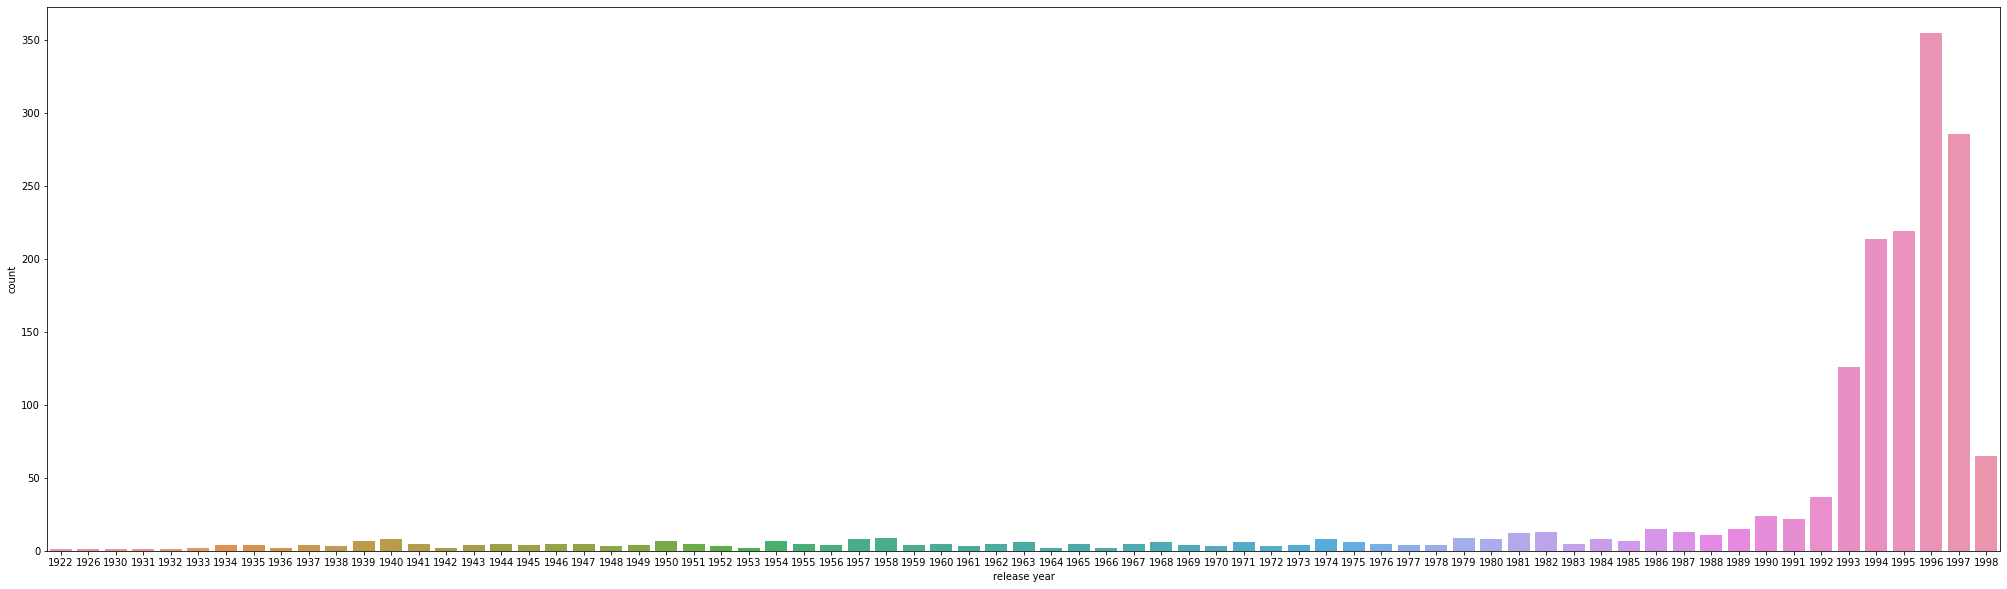

In [26]:
print('Min year in the dataset: ', movie_info['release year'].min())
print('Max year in the dataset: ', movie_info['release year'].max())
plt.figure(figsize=(35,10))
sns.countplot(movie_info['release year']) # This represents number of movies per each year
plt.show()

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


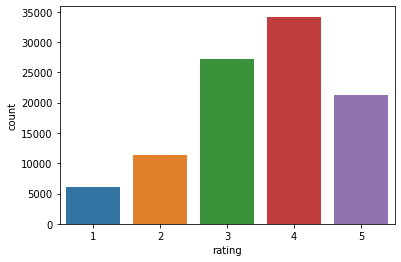

In [27]:
sns.countplot(user_movie_ratings['rating']); # The plot will tell us count of ratings for each rating number

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [28]:
#your code here
movies_groupedby_year = movie_info.groupby('release year').sum() # Group by year and perform sum aggregation to get the
# number of movies released per genre in a given year
movies_groupedby_year.drop('movie id', axis=1, inplace=True) # dropped movies id column
total_no_of_movies_per_year =  movie_info.groupby('release year')['movie id'].count() # To get the total number of movies released in a given
# year, group by year and get the movie id count
movies_groupedby_year = movies_groupedby_year.div(total_no_of_movies_per_year, axis=0)* 100 #Devide each genre 
# with the total number of movies released in a year and multiplied with 100 to get the percent of number of releases
# in a year
movies_groupedby_year # data set with popularity of genre for each year

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
1932,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,14.018692,6.074766,1.869159,7.009346,38.317757,3.738318,4.205607,45.327103,1.401869,0.000000,3.738318,0.934579,0.934579,16.355140,3.271028,11.682243,3.271028,2.803738
1995,0.0,18.264840,10.045662,2.739726,9.589041,28.767123,5.022831,2.283105,40.639269,1.369863,0.456621,6.392694,1.369863,2.283105,16.894977,6.849315,17.808219,2.283105,0.913242
1996,0.0,12.394366,6.760563,2.535211,5.915493,30.422535,5.915493,5.070423,47.887324,1.690141,0.281690,3.098592,2.535211,1.690141,10.704225,4.225352,13.239437,2.535211,0.563380


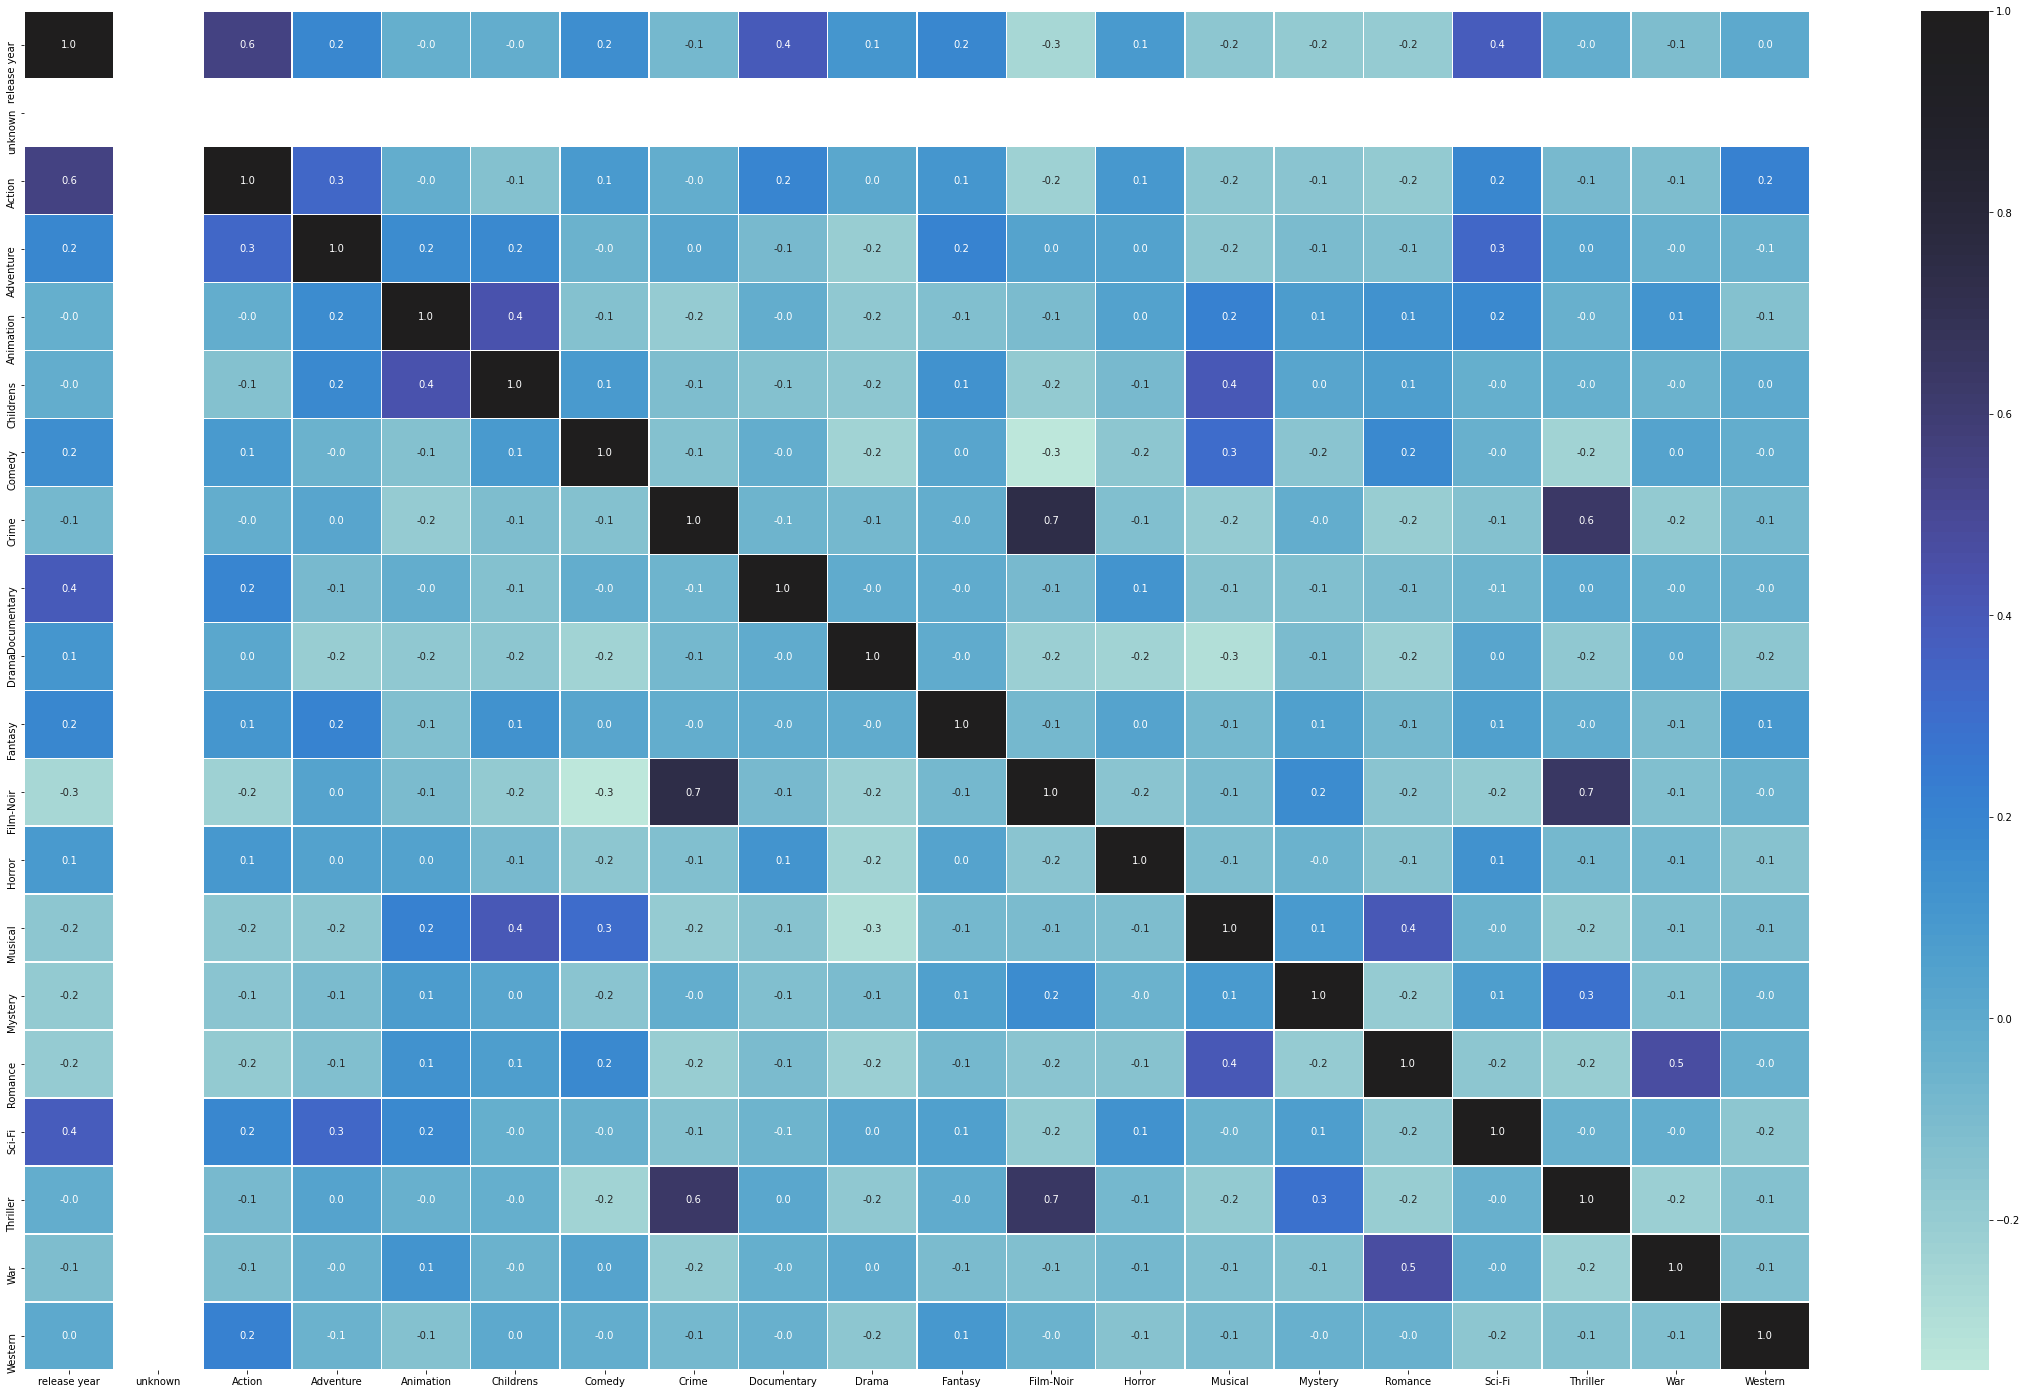

In [29]:
plt.figure(figsize=(40,25))
sns.heatmap(movies_groupedby_year.reset_index().corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1) # heatmap
plt.show()

<AxesSubplot:xlabel='release year', ylabel='popularity of a genre'>

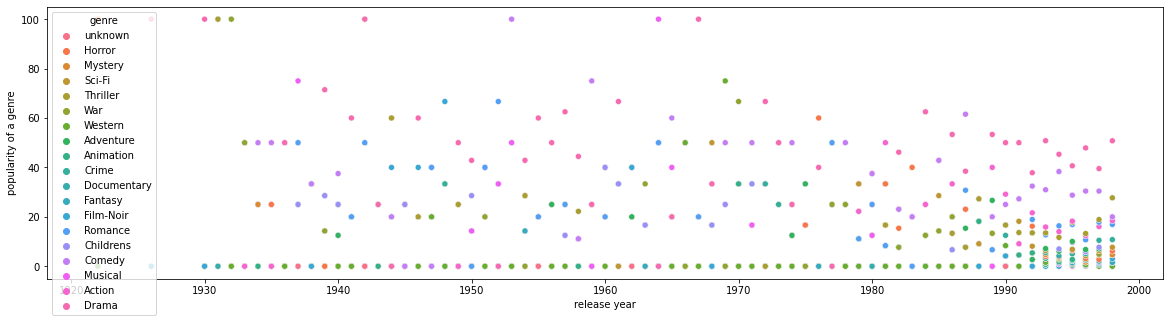

In [30]:
# Converting all categorical columns in to a new column genre using pandas stacking feature
genre_popularity_over_years = movies_groupedby_year.stack().rename_axis(['release year', 'genre']).rename('popularity of a genre').reset_index()
genre_popularity_over_years = genre_popularity_over_years.sort_values('popularity of a genre')
plt.figure(figsize=(20,5))
# Used scatter plot between popularity of genre and release year to see  change of genre popularity over the years, instead
# of using multiple univariate plots.
# Since heatmaps are to see the correleation between the variables. Here all the variables are movie genres
# which doesn't tell us the popularity of genre over the years. I hope this is an accepted solution
sns.scatterplot(x='release year', y='popularity of a genre', data=genre_popularity_over_years, hue='genre')

**Insights:**

1. The popularity of genres slightly decreasing over the years

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [31]:
#your code here
movies_with_rating = movie_info.merge(user_movie_ratings, how='inner', on='movie id') # Merged movie and rating data sets
movies_groupby_title = movies_with_rating.groupby(['movie title'])# grouped by movie title
rating_count_per_movie = movies_groupby_title['rating'].count().reset_index() # Finding the rating count per movie
#Finding average rating for each movie
average_rating_per_movie = movies_groupby_title['rating'].mean().rename_axis(['movie title']).rename('average rating').reset_index()
#merged both rating count and average count on movie title
df_with_rating_and_average_rating_per_movie = rating_count_per_movie.merge(average_rating_per_movie, how='inner', on='movie title')
#Filter the movies whose rating count is more than 100, sorted by rating count in descending order and took top 25 using head function
top_25_movies = df_with_rating_and_average_rating_per_movie[df_with_rating_and_average_rating_per_movie['rating'] > 100].sort_values(by='average rating', ascending=False).head(25)
print('The top 25 movies in terms of average ratings for movies that have been rated more than 100 times')
top_25_movies

The top 25 movies in terms of average ratings for movies that have been rated more than 100 times


,movie title,rating,average rating
317,"Close Shave, A",112,4.491071
1277,Schindler's List,298,4.466443
1646,"Wrong Trousers, The",118,4.466102
272,Casablanca,243,4.456790
1312,"Shawshank Redemption, The",283,4.445230
1213,Rear Window,209,4.387560
1566,"Usual Suspects, The",267,4.385768
1393,Star Wars,583,4.358491
3,12 Angry Men,125,4.344000
302,Citizen Kane,198,4.292929


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [33]:
#your code here
movies_with_rating = movie_info.merge(user_movie_ratings, how='inner', on='movie id')# merged movie and rating data sets
merged_movie_data = movies_with_rating.merge(user_info, how='inner', on='user id') #merged all datasets
gender_ratings_per_genre = merged_movie_data.groupby('gender').sum()#group by gender
genres = movie_info.columns[3:len(movie_info.columns)-1]
gender_ratings_per_genre['Total No Of Ratings'] = gender_ratings_per_genre[genres].sum(axis=1)# genre is an array of 
# different genre names exists in the datasets
gender_rating_percentage_per_genre = gender_ratings_per_genre.div(gender_ratings_per_genre['Total No Of Ratings'],axis=0)*100

print('Men watch more drama than women:', (gender_rating_percentage_per_genre['Drama']['M'] > gender_rating_percentage_per_genre['Drama']['F']))
print('Women watch more Sci-Fi than men:', (gender_rating_percentage_per_genre['Sci-Fi']['F'] > gender_rating_percentage_per_genre['Sci-Fi']['M']))
print('Men watch more Romance than women:', (gender_rating_percentage_per_genre['Romance']['M'] > gender_rating_percentage_per_genre['Romance']['F']))

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Sci-Fi,Thriller,War,Western,release year,user id,rating,timestamp,age,Total No Of Ratings
gender,,,,,,,,,,,,,,,,,,,,,
F,21326.688516,0.0,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,...,4.895626,9.47096,4.076274,0.690862,95300.191803,22766.488520,169.259418,4.236154e+10,1548.796112,100.0
M,19571.883890,0.0,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,...,6.357468,10.56494,4.537272,0.933385,92897.084036,21411.630498,164.937942,4.128518e+10,1551.441303,100.0


**Conclusion:**
    
1. We can say that all the above given assumptions are False
2. Men watch more Adventure, Action, war, sci-fi and thriller movies than women
3. Women watch more Animatation, children, comedy, drama and Romance movies than men